# Tarea Grande 1

##### Nombre: Jessica Hormazabal
## Importación de librerías

En la siguiente celda, se importarán las librerías que serán utilizadas para esta parte de la tarea. Si deseas utilizar una librería adicional y que no sea *built-in*, repórtala en el ```README.md``` de tu repositorio. Solo así podremos saber que necesitamos instalar algo más para ejecutar tu tarea y evaluarla.

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import random
import numpy as np
import calendar

## Cargar datos

In [42]:
with open('puntos_bip_fixed.csv','r',encoding='utf-8') as data:
    lista_cod = [elem.strip("\n").split(",")[0] for elem in
             data if elem != 'Codigo']
    lista_cod.remove('Codigo')

## Generar 10000 transacciones aleatorias

In [43]:
def random_date(start, end):
    """
    Generate a random datetime between `start` and `end`
    link: https://stackoverflow.com/questions/553303/generate-a-random-date-between-two-other-dates
    Respuesta de emyller, nov 17'11 at 16:25
    """
    return start + datetime.timedelta(
        # Get a random amount of seconds between `start` and `end`
        seconds=random.randint(0, int((end - start).total_seconds())),
    )

def random_carga():
    return random.randrange(750,25500,10)

with open('puntos_carga.csv', 'w',encoding='utf-8') as data:
    data.write("Codigo,Fecha,Monto Carga\n")
    for i in range(10000):
        d1 = datetime.date(2017, 1, 1)
        d2 = datetime.date(2017, 12, 31)
        s = random_date(d1,d2)
        obj = random.choice(lista_cod)
        data.write("{},{},{}\n".format(obj,s,random_carga()))


## Comunas con mayor cantidad de Centros Bip!

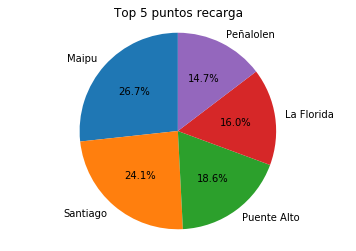

In [44]:
with open('puntos_bip_fixed.csv','r',encoding='utf-8') as data:
    lista = [elem.strip("\n").split(",")[3] for elem in
             data]
    lista.remove('Comuna')

def orden_x_comuna(lista):
    dic = {}
    for elem in lista:
        if elem not in dic.keys():
            dic[elem] = 1
        else:
            ant = dic[elem]
            dic[elem] = ant + 1
    l = []
    for elem in dic.keys():
        l.append((dic[elem],elem))
    orden = sorted(l, reverse=True)[:5]
    with open('top_5_puntos.csv','w',encoding='utf-8') as data:
        data.write("Comuna, Cantidad\n")
        for elem in orden:
            data.write("{},{}\n".format(elem[1],elem[0]))
    return orden

orden_x_comuna(lista)

df = pd.read_csv('top_5_puntos.csv',encoding='utf-8')
fig = plt.figure()
plt.title("Top 5 puntos recarga")
plt.pie(df[' Cantidad'],labels=df['Comuna'],autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

## Cantidad de cargas según día de la semana

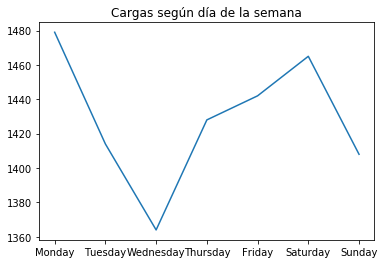

In [45]:
with open('puntos_carga.csv','r',encoding='utf-8') as data:
    lista = [elem.strip("\n").split(",")[1] for elem in
             data]
    lista.remove('Fecha')

dic = {}
for i in range(len(lista)):
    fc = lista[i].split('-')
    dt = datetime.date(int(fc[0]),int(fc[1]),int(fc[2]))
    cal = calendar.day_name[dt.weekday()]
    if cal not in dic.keys():
        dic[cal] = 1
    else:
        ant = dic[cal]
        dic[cal] = ant + 1

def orden_dia(dic):
    dias = []
    dia = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,
           'Saturday':6,'Sunday':7}
    for elem in dic.keys():
        dias.append((dia[elem],elem, dic[elem]))
    return sorted(dias)

dias = orden_dia(dic)

with open('week_days.csv','w',encoding='utf-8') as data:
    data.write("Dia, Cantidad\n")
    for elem in dias:
        data.write("{},{}\n".format(elem[1],elem[2]))

df = pd.read_csv('week_days.csv',encoding='utf-8')
#print(df['Dia'])
plt.plot(df[" Cantidad"])
X = np.arange(7)
plt.xticks(X, df['Dia'])
plt.title("Cargas según día de la semana")
plt.show()

## Monto total recargado por mes

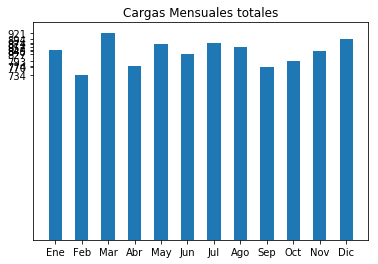

In [59]:
dic = {}
for i in range(len(lista)):
    fc = lista[i].split('-')
    dt = datetime.date(int(fc[0]),int(fc[1]),int(fc[2]))
    cal = calendar.month_name[dt.month]
    if cal not in dic.keys():
        dic[cal] = 1
    else:
        ant = dic[cal]
        dic[cal] = ant + 1

def orden_mes(dic):
    dias = []
    dia = {'January':1,'February':2,'March':3,'April':4,'May':5,
           'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
    for elem in dic.keys():
        dias.append((dia[elem],elem, dic[elem]))
    return sorted(dias)

meses = orden_mes(dic)
X = np.arange(12)

with open('month_charge.csv','w',encoding='utf-8') as data:
    data.write("Mes, Cantidad\n")
    for elem in meses:
        data.write("{},{}\n".format(elem[1],elem[2]))


df = pd.read_csv('month_charge.csv',encoding='utf-8')
plt.bar(X,df[" Cantidad"],width = 0.5)
plt.xticks(X, ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct",
               "Nov","Dic"])
y = np.arange(len(df[" Cantidad"]))
#plt.barh(y, df[" Cantidad"], align = "center")
plt.yticks(df[" Cantidad"])
plt.title("Cargas Mensuales totales")
plt.show()


## Montos totales recargados por comuna

In [39]:
with open('puntos_bip_fixed.csv','r',encoding='utf-8') as data:
    lista = [(elem.strip("\n").split(",")[0],elem.strip("\n").split(",")[3]) for elem in
             data if elem.strip("\n").split(",")[0] != 'Codigo' and
             elem.strip("\n").split(",")[3] != 'Comuna']

with open('puntos_carga.csv', 'r',encoding='utf-8') as data:
    cod_mon =[(elem.strip("\n").split(",")[0],elem.strip("\n").split(",")[2]) for elem in
             data if elem.strip("\n").split(",")[0] != 'Codigo']

cod_mon.sort()
cm = {}
for elem in cod_mon:
    cod = elem[0]
    mont = int(elem[1])
    if cod not in cm.keys():
        cm[cod] = mont
    else:
        ant = cm[cod]
        cm[cod] = mont + ant

com = {}
for elem in lista:
    cod = elem[0]
    mont = elem[1]
    if mont not in com.keys():
        com[mont] = cod
    else:
        ant = com[mont]
        com[mont] = cod +";"+ ant
final = []
for elem in com.keys():
    tot = 0
    lis = com[elem].split(";")
    comuna = elem
    for ele in lis:
        try:
            tot += cm[ele]
        except:
            tot += 0
    final.append((tot,comuna))

with open('money_comuna.csv','w',encoding='utf-8') as data:
    data.write("Mes, Monto\n")
    for elem in final:
        data.write("{},{}\n".format(elem[1],elem[0]))

final.sort(reverse=True)
with open('top_5_montos.csv','w',encoding='utf-8') as data:
    data.write("Mes, Monto\n")
    for elem in final[:5]:
        data.write("{},{}\n".format(elem[1], elem[0]))


features = ['Mes', 'Monto']
df = pd.read_csv('money_comuna.csv',encoding='utf-8')
iris = pd.DataFrame(df, columns=features)
iris['Monto'] = pd.Series(df[' Monto'])
iris

,Mes,Monto
0,Las Condes,3334930
1,Santiago,9019280
2,Maipu,10564030
3,La Cisterna,1729060
4,Conchali,4502020
5,Melipilla,271760
6,Peñaflor,151100
7,Puente Alto,7198160
8,San Joaquin,2728430
9,Providencia,3331160
